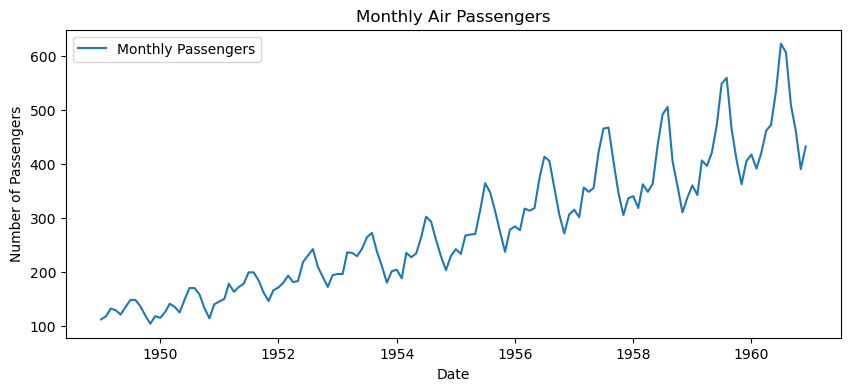

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -396.681
Date:                            Wed, 30 Jul 2025   AIC                            803.363
Time:                                    00:21:47   BIC                            816.633
Sample:                                01-01-1949   HQIC                           808.740
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5400      0.338     -1.596      0.110      -1.203       0.123
ma.L1          0.3075      0.368   

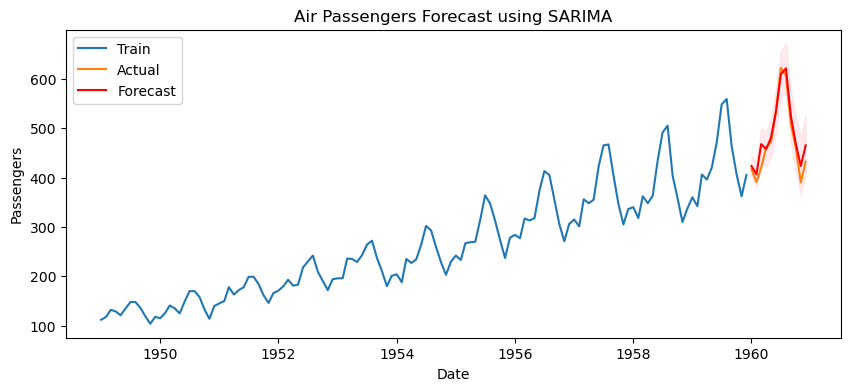

Mean Squared Error: 467.48


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 2: Plot the original series
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Step 3: Split into train and test (last 12 months for test)
train = df.iloc[:-12]
test = df.iloc[-12:]

# Step 4: Fit SARIMA model
model = SARIMAX(train['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
result = model.fit()

# Step 5: Summary of the model
print(result.summary())

# Step 6: Forecast next 12 months
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 7: Plot forecast vs actual
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title('Air Passengers Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Step 8: Evaluation - Mean Squared Error
mse = mean_squared_error(test['Passengers'], forecast_mean)
print(f'Mean Squared Error: {mse:.2f}')


In [24]:
# Step 9: Display forecast for each month in 1961
forecast_1961 = forecast_mean
forecast_1961.index = pd.date_range(start='1961-01-01', periods=12, freq='MS')
print("Predicted Passengers for 1961:")
print(forecast_1961)


Predicted Passengers for 1961:
1961-01-01    423.220775
1961-02-01    406.433567
1961-03-01    467.547433
1961-04-01    457.478941
1961-05-01    480.937601
1961-06-01    534.599304
1961-07-01    609.414970
1961-08-01    621.009678
1961-09-01    523.363515
1961-10-01    468.643695
1961-11-01    423.339480
1961-12-01    465.073605
Freq: MS, Name: predicted_mean, dtype: float64
